 White Noise

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from arch.unitroot import KPSS, ADF, PhillipsPerron
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


<Axes: >

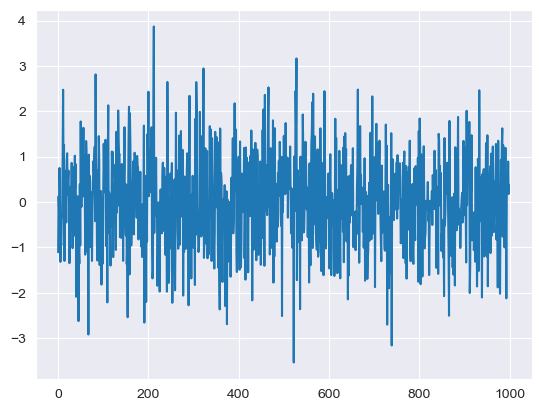

In [2]:
# create data

data   = np.random.normal(0, 1, 1000)
data   = pd.Series(data)
data.plot()

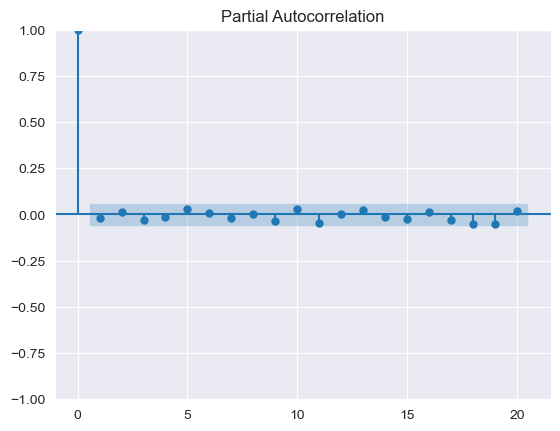

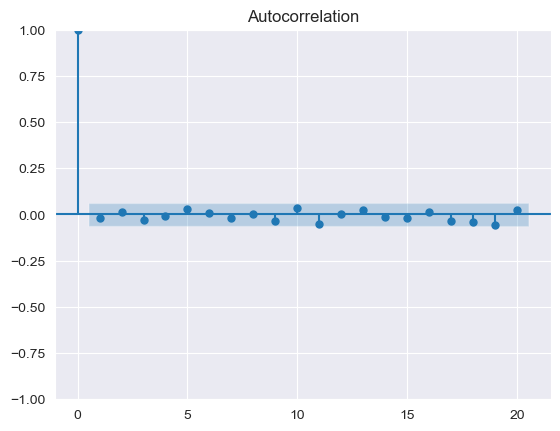

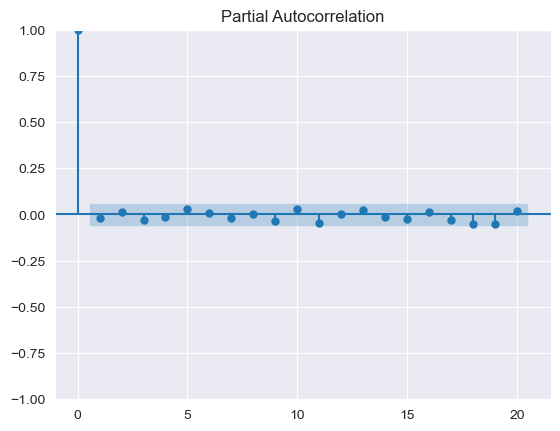

In [3]:
# ACF and PACF
plot_acf(data, lags=20)

plot_pacf(data, lags=20)



In [4]:
def root_analysis(data):
    models = ['n', 'c', 'ct']
    rows = []
    
    for model in models:
        try:
            adf = ADF(data, method='aic', trend=model)
            pp = PhillipsPerron(data, test_type='tau', trend=model)
            kpss = KPSS(data, trend=model)

            # Satırları rows listesine ekleyin
            rows.append({
                'Test name': adf._test_name,
                'kind of': adf.trend,
                'Lag': adf.lags,
                'Test stat': adf.stat,
                'P value': adf.pvalue,
                'H-null': adf.null_hypothesis
            })
            rows.append({
                'Test name': pp._test_name,
                'kind of': pp.trend,
                'Lag': pp.lags,
                'Test stat': pp.stat,
                'P value': pp.pvalue,
                'H-null': pp.null_hypothesis
            })
            rows.append({
                'Test name': kpss._test_name,
                'kind of': kpss.trend,
                'Lag': kpss.lags,
                'Test stat': kpss.stat,
                'P value': kpss.pvalue,
                'H-null': kpss.null_hypothesis
            })
        except ValueError:
            # Hata durumunda sadece ADF ve PhillipsPerron testlerini çalıştır
            adf = ADF(data, method='aic', trend=model)
            pp = PhillipsPerron(data, test_type='tau', trend=model)
            
            rows.append({
                'Test name': adf._test_name,
                'kind of': adf.trend,
                'Lag': adf.lags,
                'Test stat': adf.stat,
                'P value': adf.pvalue,
                'H-null': adf.null_hypothesis
            })
            rows.append({
                'Test name': pp._test_name,
                'kind of': pp.trend,
                'Lag': pp.lags,
                'Test stat': pp.stat,
                'P value': pp.pvalue,
                'H-null': pp.null_hypothesis
            })

    # Tüm satırları içeren DataFrame oluşturun
    df = pd.DataFrame(rows)

    return df


In [6]:
root_analysis(data)




,Test name,kind of,Lag,Test stat,P value,H-null
0,Augmented Dickey-Fuller,n,0,-32.214163,0.000000,The process contains a unit root.
1,Phillips-Perron Test,n,22,-32.305102,0.000000,The process contains a unit root.
2,Augmented Dickey-Fuller,c,0,-32.198847,0.000000,The process contains a unit root.
3,Phillips-Perron Test,c,22,-32.289459,0.000000,The process contains a unit root.
4,KPSS Stationarity Test,c,4,0.218531,0.234674,The process is weakly stationary.
5,Augmented Dickey-Fuller,ct,0,-32.237609,0.000000,The process contains a unit root.
6,Phillips-Perron Test,ct,22,-32.396154,0.000000,The process contains a unit root.
7,KPSS Stationarity Test,ct,5,0.053217,0.530823,The process is weakly stationary.


In [48]:

data = np.random.normal(0, 1, 1000)
data_20 = np.split(data, 20)
mean, std = [], []
for i in range(20):
    mean.append(data_20[i].mean())
    std.append(data_20[i].std())


    
    


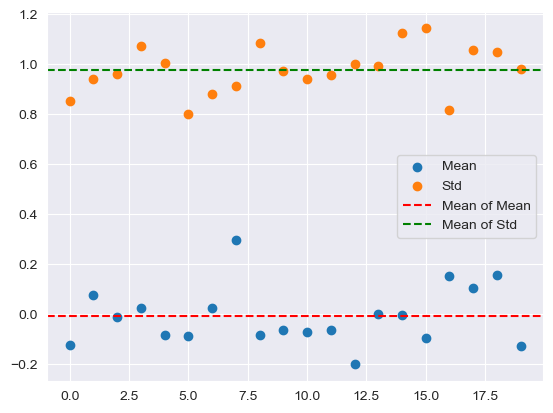

In [69]:
plt.scatter(np.arange(len(mean)), mean, label='Mean')
plt.scatter(np.arange(len(std)), std, label='Std')
plt.axhline(np.mean(mean), color='r', linestyle='--', label='Mean of Mean')
plt.axhline(np.mean(std), color='g', linestyle='--', label='Mean of Std')

plt.legend()
plt.show()


In [65]:
)

array([0, 1, 2, 3, 4, 5])